<a href="https://colab.research.google.com/github/legion911/7code_Task1/blob/main/Titanic_Classification(Task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [200]:
df = pd.read_csv(r'https://github.com/legion911/7code_Task1/raw/main/Titanic-Dataset.csv')

In [201]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [203]:
df.shape

(891, 12)

In [204]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [205]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [206]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [207]:
df.duplicated().sum()

0

In [208]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [209]:
df[df['Pclass']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [210]:
import seaborn as sns

<ipython-input-211-3414db7f92e7>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.displot(data=df, x='Age', hue='Survived', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)


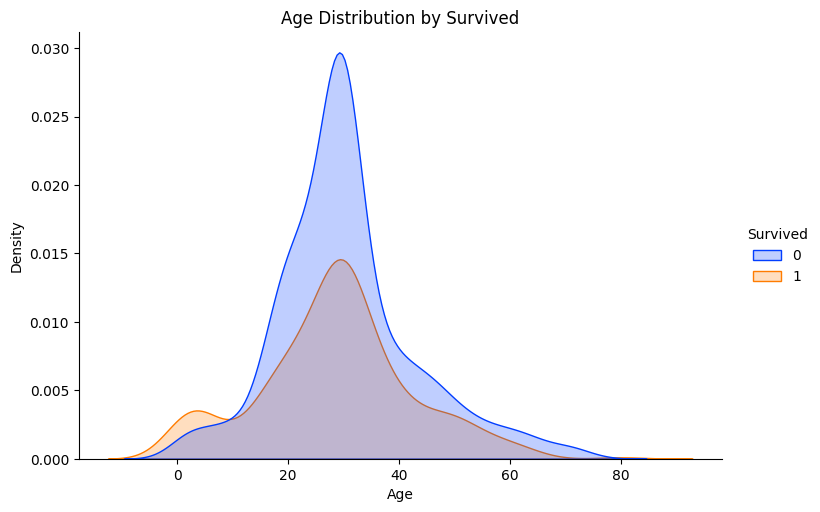

In [211]:
sns.displot(data=df, x='Age', hue='Survived', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Age Distribution by Survived')
plt.show()

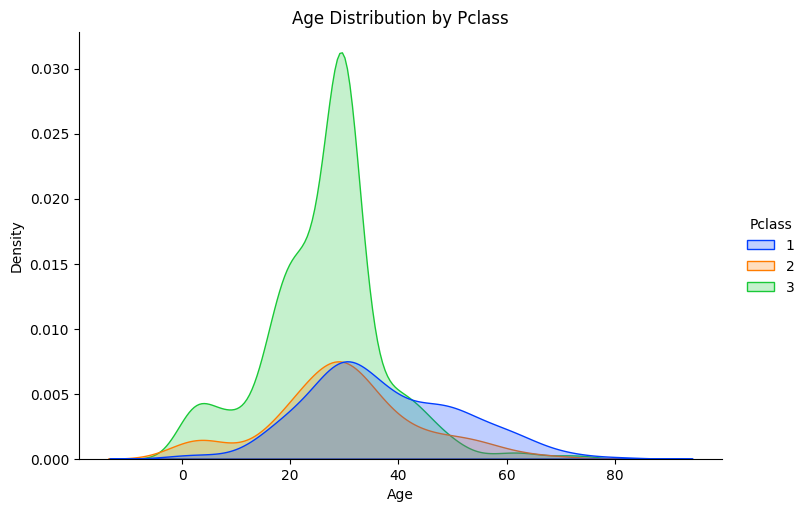

In [212]:
sns.displot(data=df, x='Age', hue='Pclass', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Age Distribution by Pclass')
plt.show()

In [213]:
df_corr = df.drop(['PassengerId'], axis = 1)

In [214]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1)

<ipython-input-215-d17fdee85bd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr(),annot = True, cmap = plt.cm.Reds)


Text(0.5, 1.0, 'Correlation Matrix')

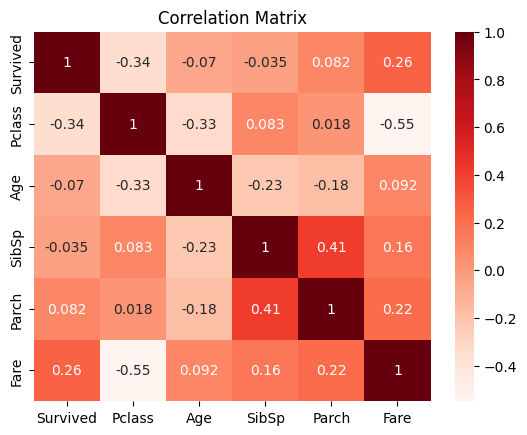

In [215]:
sns.heatmap(df_corr.corr(),annot = True, cmap = plt.cm.Reds)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'PairPlot')

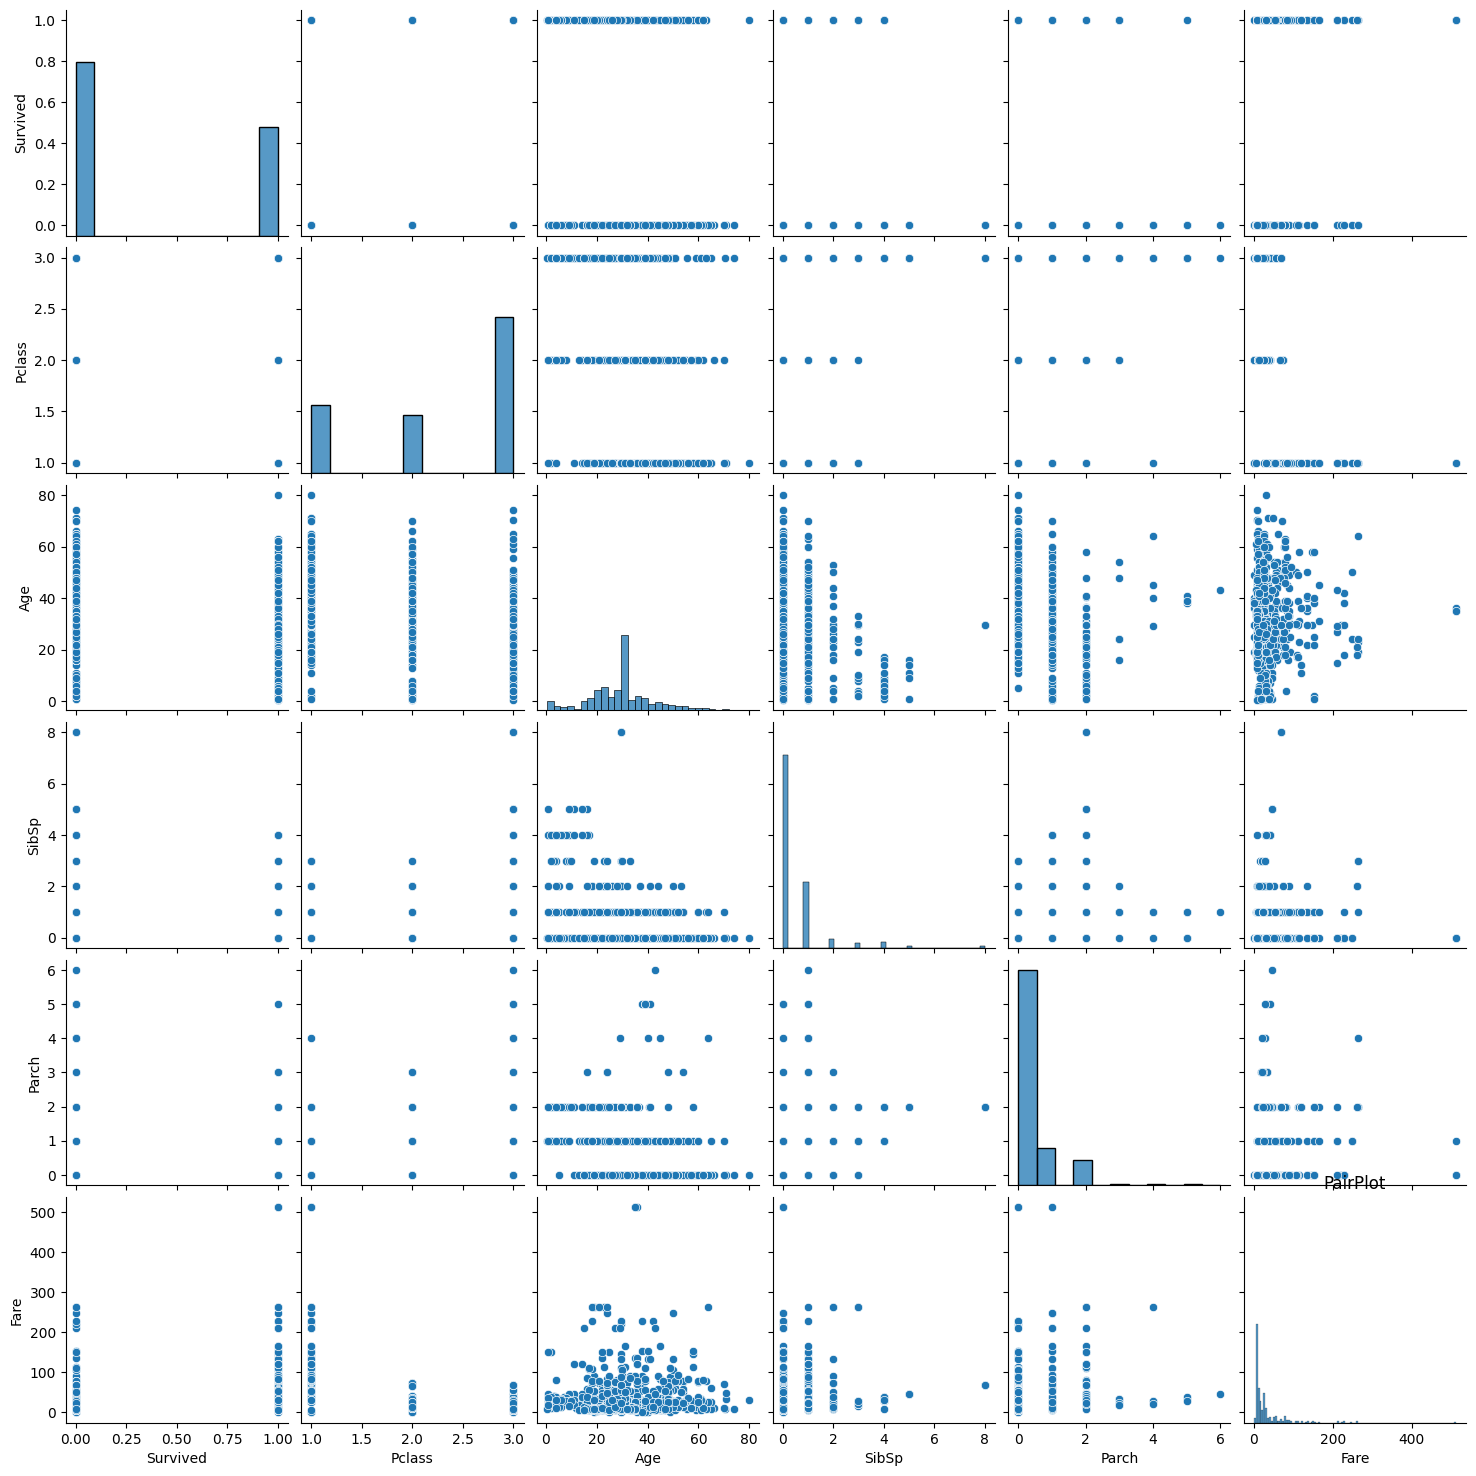

In [240]:
sns.pairplot(data=df_corr)
plt.title('PairPlot')

In [217]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

In [218]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [219]:
train_data = df.sample(frac=0.7, random_state=25)
test_data = df.drop(train_data.index)

In [220]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
760,761,0,3,1,29.699118,0,0,14.5000,2
773,774,0,3,1,29.699118,0,0,7.2250,0
266,267,0,3,1,16.000000,4,1,39.6875,2
507,508,1,1,1,29.699118,0,0,26.5500,2
524,525,0,3,1,29.699118,0,0,7.2292,0


In [221]:
X = train_data.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train_data['Survived']

In [222]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
760,3,1,29.699118,0,0,14.5000,2
773,3,1,29.699118,0,0,7.2250,0
266,3,1,16.000000,4,1,39.6875,2
507,1,1,29.699118,0,0,26.5500,2
524,3,1,29.699118,0,0,7.2292,0


In [223]:
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
ct = ColumnTransformer([('X_train', MinMaxScaler(), ['Age','Fare'])], remainder ='passthrough')
X_train, X_test, y_train5, y_test5 = train_test_split(X, y, test_size=0.25, random_state=0)

In [224]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [225]:
LogReg = LogisticRegression(random_state=42, solver="liblinear")
LogReg.fit(X_train, y_train5)

LogisticRegression(random_state=42, solver='liblinear')

In [226]:
MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

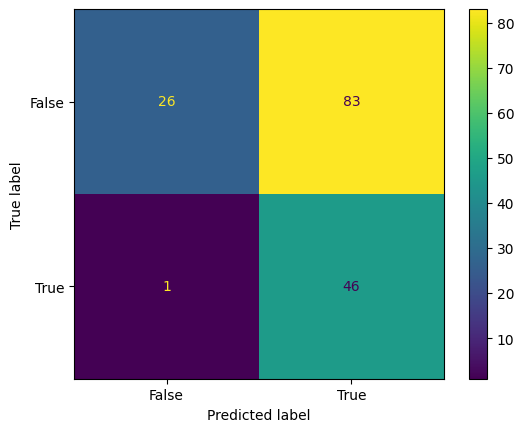

In [227]:
y_pred = LogReg.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=LogReg.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [228]:
from sklearn.model_selection import train_test_split, cross_val_score
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [229]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7884615384615384
CV Score: 0.7451225806451613


In [230]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8333333333333334
CV Score: 0.7996774193548387


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [231]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8012820512820513
CV Score: 0.7997032258064516


In [232]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7948717948717948
CV Score: 0.7804516129032258


In [233]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.8012820512820513
CV Score: 0.7981290322580645


In [234]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
classify(bagging)

Accuracy: 0.7243589743589743
CV Score: 0.7563870967741936


In [235]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
classify(model)

Accuracy: 0.7884615384615384
CV Score: 0.7916645161290322


In [236]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7692307692307693
CV Score: 0.7483096774193548
